<a href="https://colab.research.google.com/github/Rickmwasofficial/Learning-Machine-Learning/blob/main/Medical_Cost_Regression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Nescessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Medical Cost Personal Dataset

Load the data
> We download the data from Kaggle. [Link](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

The task is to train a model to predict a person's spending on healthcare based on a number of features, i.e:

*   Age
*   Sex
*   BMI (Body Mass Index)
*   Number of Children
*   Smoker (Yes or No)
*   Region




In [ ]:
# Loading and viewing the data
insurance = pd.read_csv('/content/drive/MyDrive/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


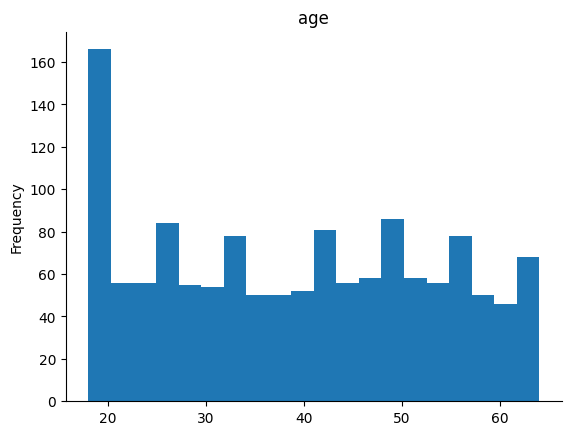

In [ ]:
# @title age

from matplotlib import pyplot as plt
insurance['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## EDA (Exploratory Data Analysis)

#### A. **Visualize:**
1. Number of Male and Female Subjects in the dataset
2. Number of Smokers and Non-smokers

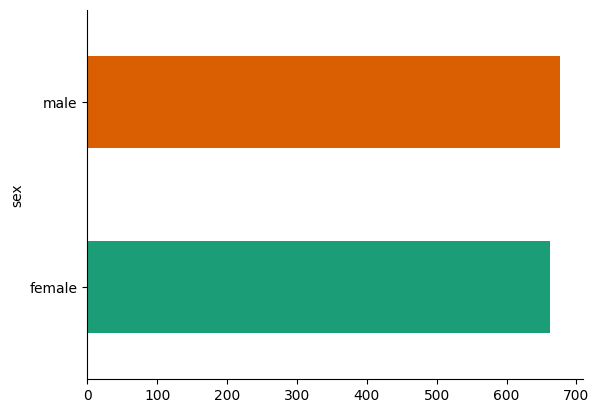

In [ ]:
insurance.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

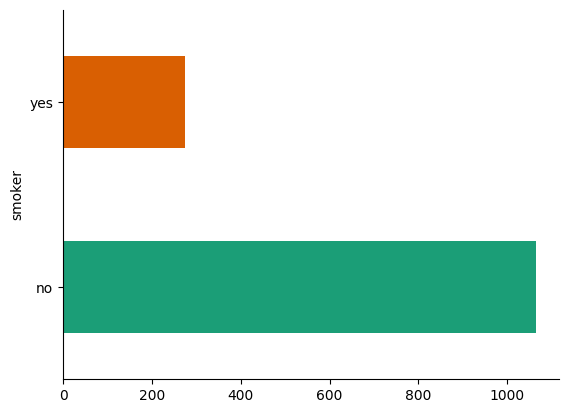

In [ ]:
insurance.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### B. **Check if there is any missing data and handle it based on the findings**

In [ ]:
insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Convert All Non-Numeric Data into Numbers

In [ ]:
# One hot encode a pandas dataframe
insurance_one_hot = pd.get_dummies(insurance).astype(int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


## Split the data

1. Split into X and y
* X = Features
* y = True Value i.e (Charges)

In [ ]:
# Create X and y values
X = insurance_one_hot.drop('charges', axis=1)
y = insurance.charges
y

,charges
0,16884.924000
1,1725.552300
2,4449.462000
3,21984.470610
4,3866.855200
5,3756.621600
6,8240.589600
7,7281.505600
8,6406.410700
9,28923.136920


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,0,1,1,0,0,1,0,0
1334,18,31,0,1,0,1,0,1,0,0,0
1335,18,36,0,1,0,1,0,0,0,1,0
1336,21,25,0,1,0,1,0,0,0,0,1


2. Split the data into Training and testing
* Training data - Data which the model learns on
* Testing data - Data which the model wil be evaluated on

In [ ]:
# Split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

## Convert the data into tensors

In [ ]:
X_train, X_test, y_train, y_test = tf.constant(X_train.astype(np.float64)), tf.constant(X_test.astype(np.float64)), tf.constant(y_train.astype(np.float64)), tf.constant(y_test.astype(np.float64))

# Create a model which will be trained on the data

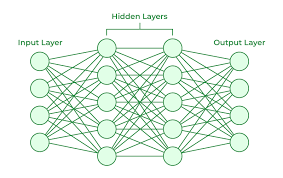

> Image of Basic Neural Network Architecture

[Visualization of how a neural network learns](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6,7,5,5,5,3&seed=0.35193&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



In [ ]:
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 11325.6445 - mae: 11325.6445
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 7490.7168 - mae: 7490.7168
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 7263.4487 - mae: 7263.4487
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7012.1191 - mae: 7012.1191
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 6727.2217 - mae: 6727.2217
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 6452.4712 - mae: 6452.4712
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 6328.8652 - mae: 6328.8652
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 6191.7158 - mae: 6191.7158
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 6003.2979 - mae: 6003.2979
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 5802.9263 - mae: 5802.92

## Evaluate the trained model

In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3179.6687 - mae: 3179.6687


[3179.668701171875, 3179.668701171875]

## Plot the loss and metrics curve

Text(0.5, 0, 'Epochs')

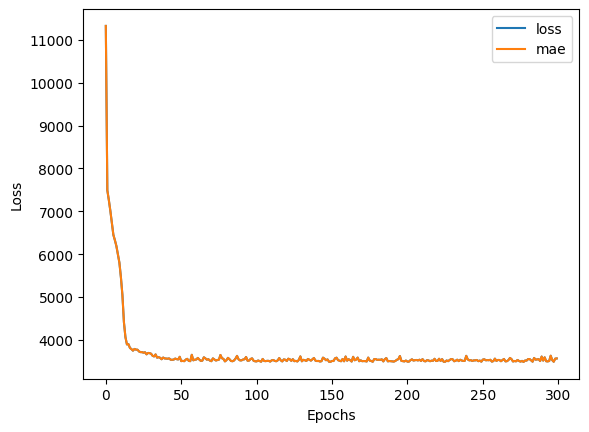

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## Save the model

In [ ]:
model.save('my_regression_model_1.keras')

NameError: name 'model' is not defined